In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(edgeitems=30, linewidth=1000)

In [103]:
import sklearn.preprocessing
import sklearn.compose
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics 

In [146]:
df = pd.read_csv("StudentsPerformance.csv")
df = df.reindex(columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score',
       'writing score', 'math score'])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,female,group B,bachelor's degree,standard,none,72,74,72
1,female,group C,some college,standard,completed,90,88,69
2,female,group B,master's degree,standard,none,95,93,90
3,male,group A,associate's degree,free/reduced,none,57,44,47
4,male,group C,some college,standard,none,78,75,76
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,88
996,male,group C,high school,free/reduced,none,55,55,62
997,female,group C,high school,free/reduced,completed,71,65,59
998,female,group D,some college,standard,completed,78,77,68


In [147]:
train, test = sklearn.model_selection.train_test_split(df, test_size=0.4,random_state=20211202)

array([[<AxesSubplot:title={'center':'reading score'}>, <AxesSubplot:title={'center':'writing score'}>],
       [<AxesSubplot:title={'center':'math score'}>, <AxesSubplot:>]], dtype=object)

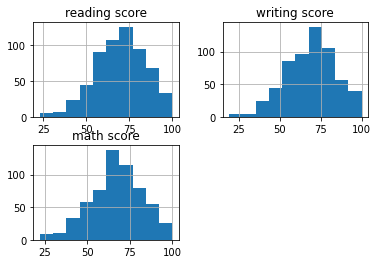

In [96]:
train.hist()

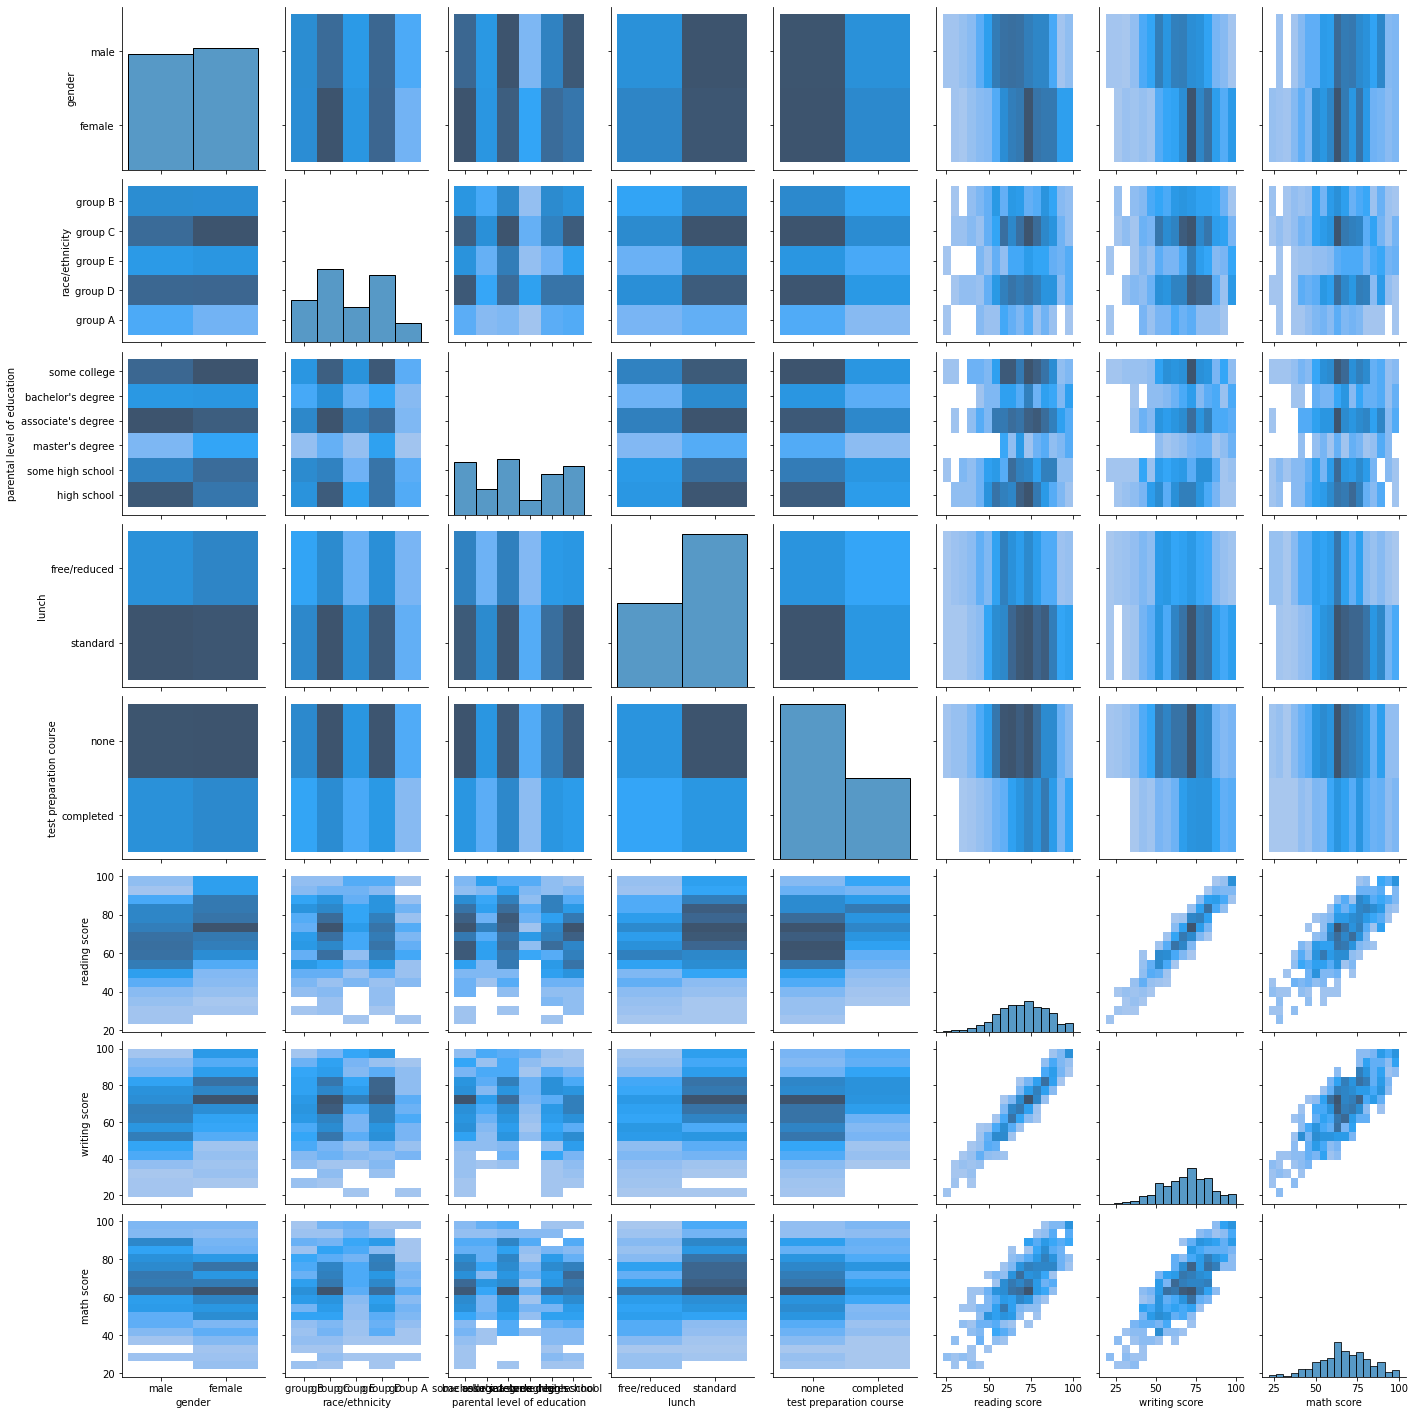

In [97]:
sns.pairplot(train,vars=df.columns,kind='hist',palette=sns.color_palette("vlag", as_cmap=True))

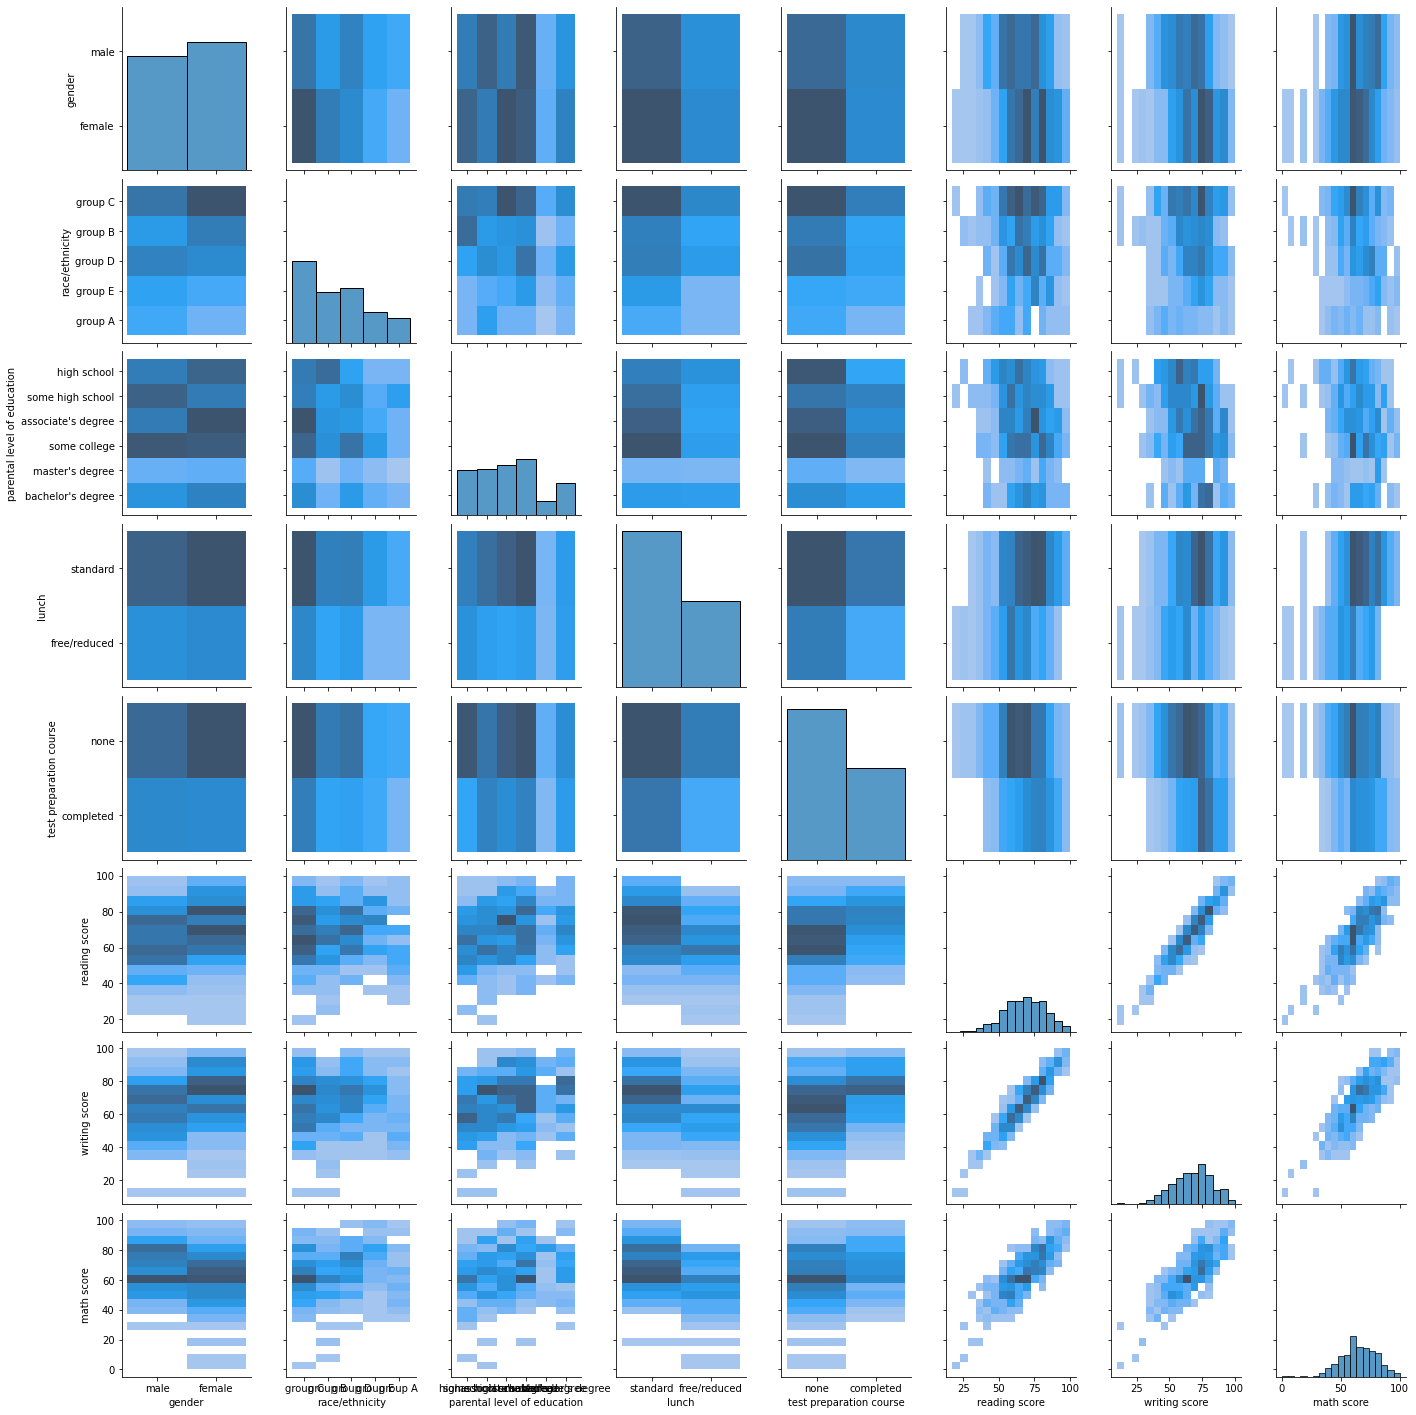

In [98]:
sns.pairplot(test,vars=df.columns,kind='hist')

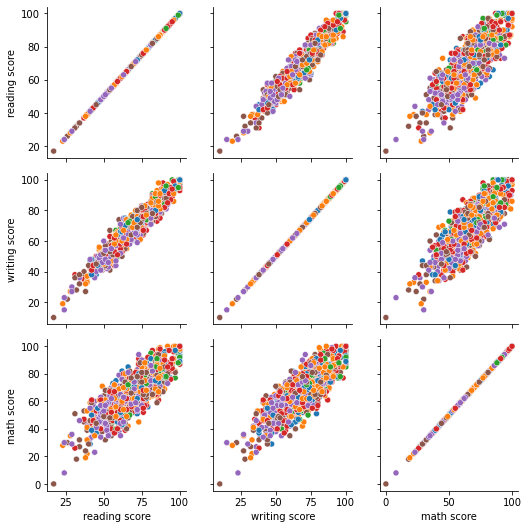

In [79]:
g = sns.PairGrid(df, hue="parental level of education")
g.map(sns.scatterplot)

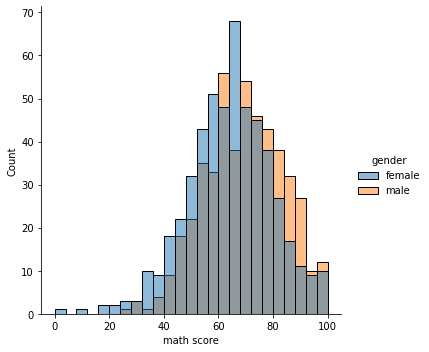

In [80]:
sb.displot(df, x='math score', hue = 'gender')

In [148]:
column_trans =  sklearn.compose.ColumnTransformer(
    [
        ('ordinal', 
         sklearn.preprocessing.OrdinalEncoder(categories=[['some high school', 'high school','some college', "associate's degree", "bachelor's degree", 
        "master's degree"]]), 
         ['parental level of education']),
        ('category', sklearn.preprocessing.OrdinalEncoder(categories=[
            ['female', 'male'],
            ['none','completed'],
            ['standard', 'free/reduced']]), 
         ["gender",'test preparation course',"lunch"]),
        ('onehot', sklearn.preprocessing.OneHotEncoder(),['race/ethnicity']),
        ('desc', sklearn.preprocessing.KBinsDiscretizer(encode='ordinal'), ['reading score'])
        
    ], remainder='passthrough'
)
column_trans.fit(train)
X = column_trans.transform(train)
scaler = sklearn.preprocessing.StandardScaler().fit(X)
Xscaled = scaler.transform(X)

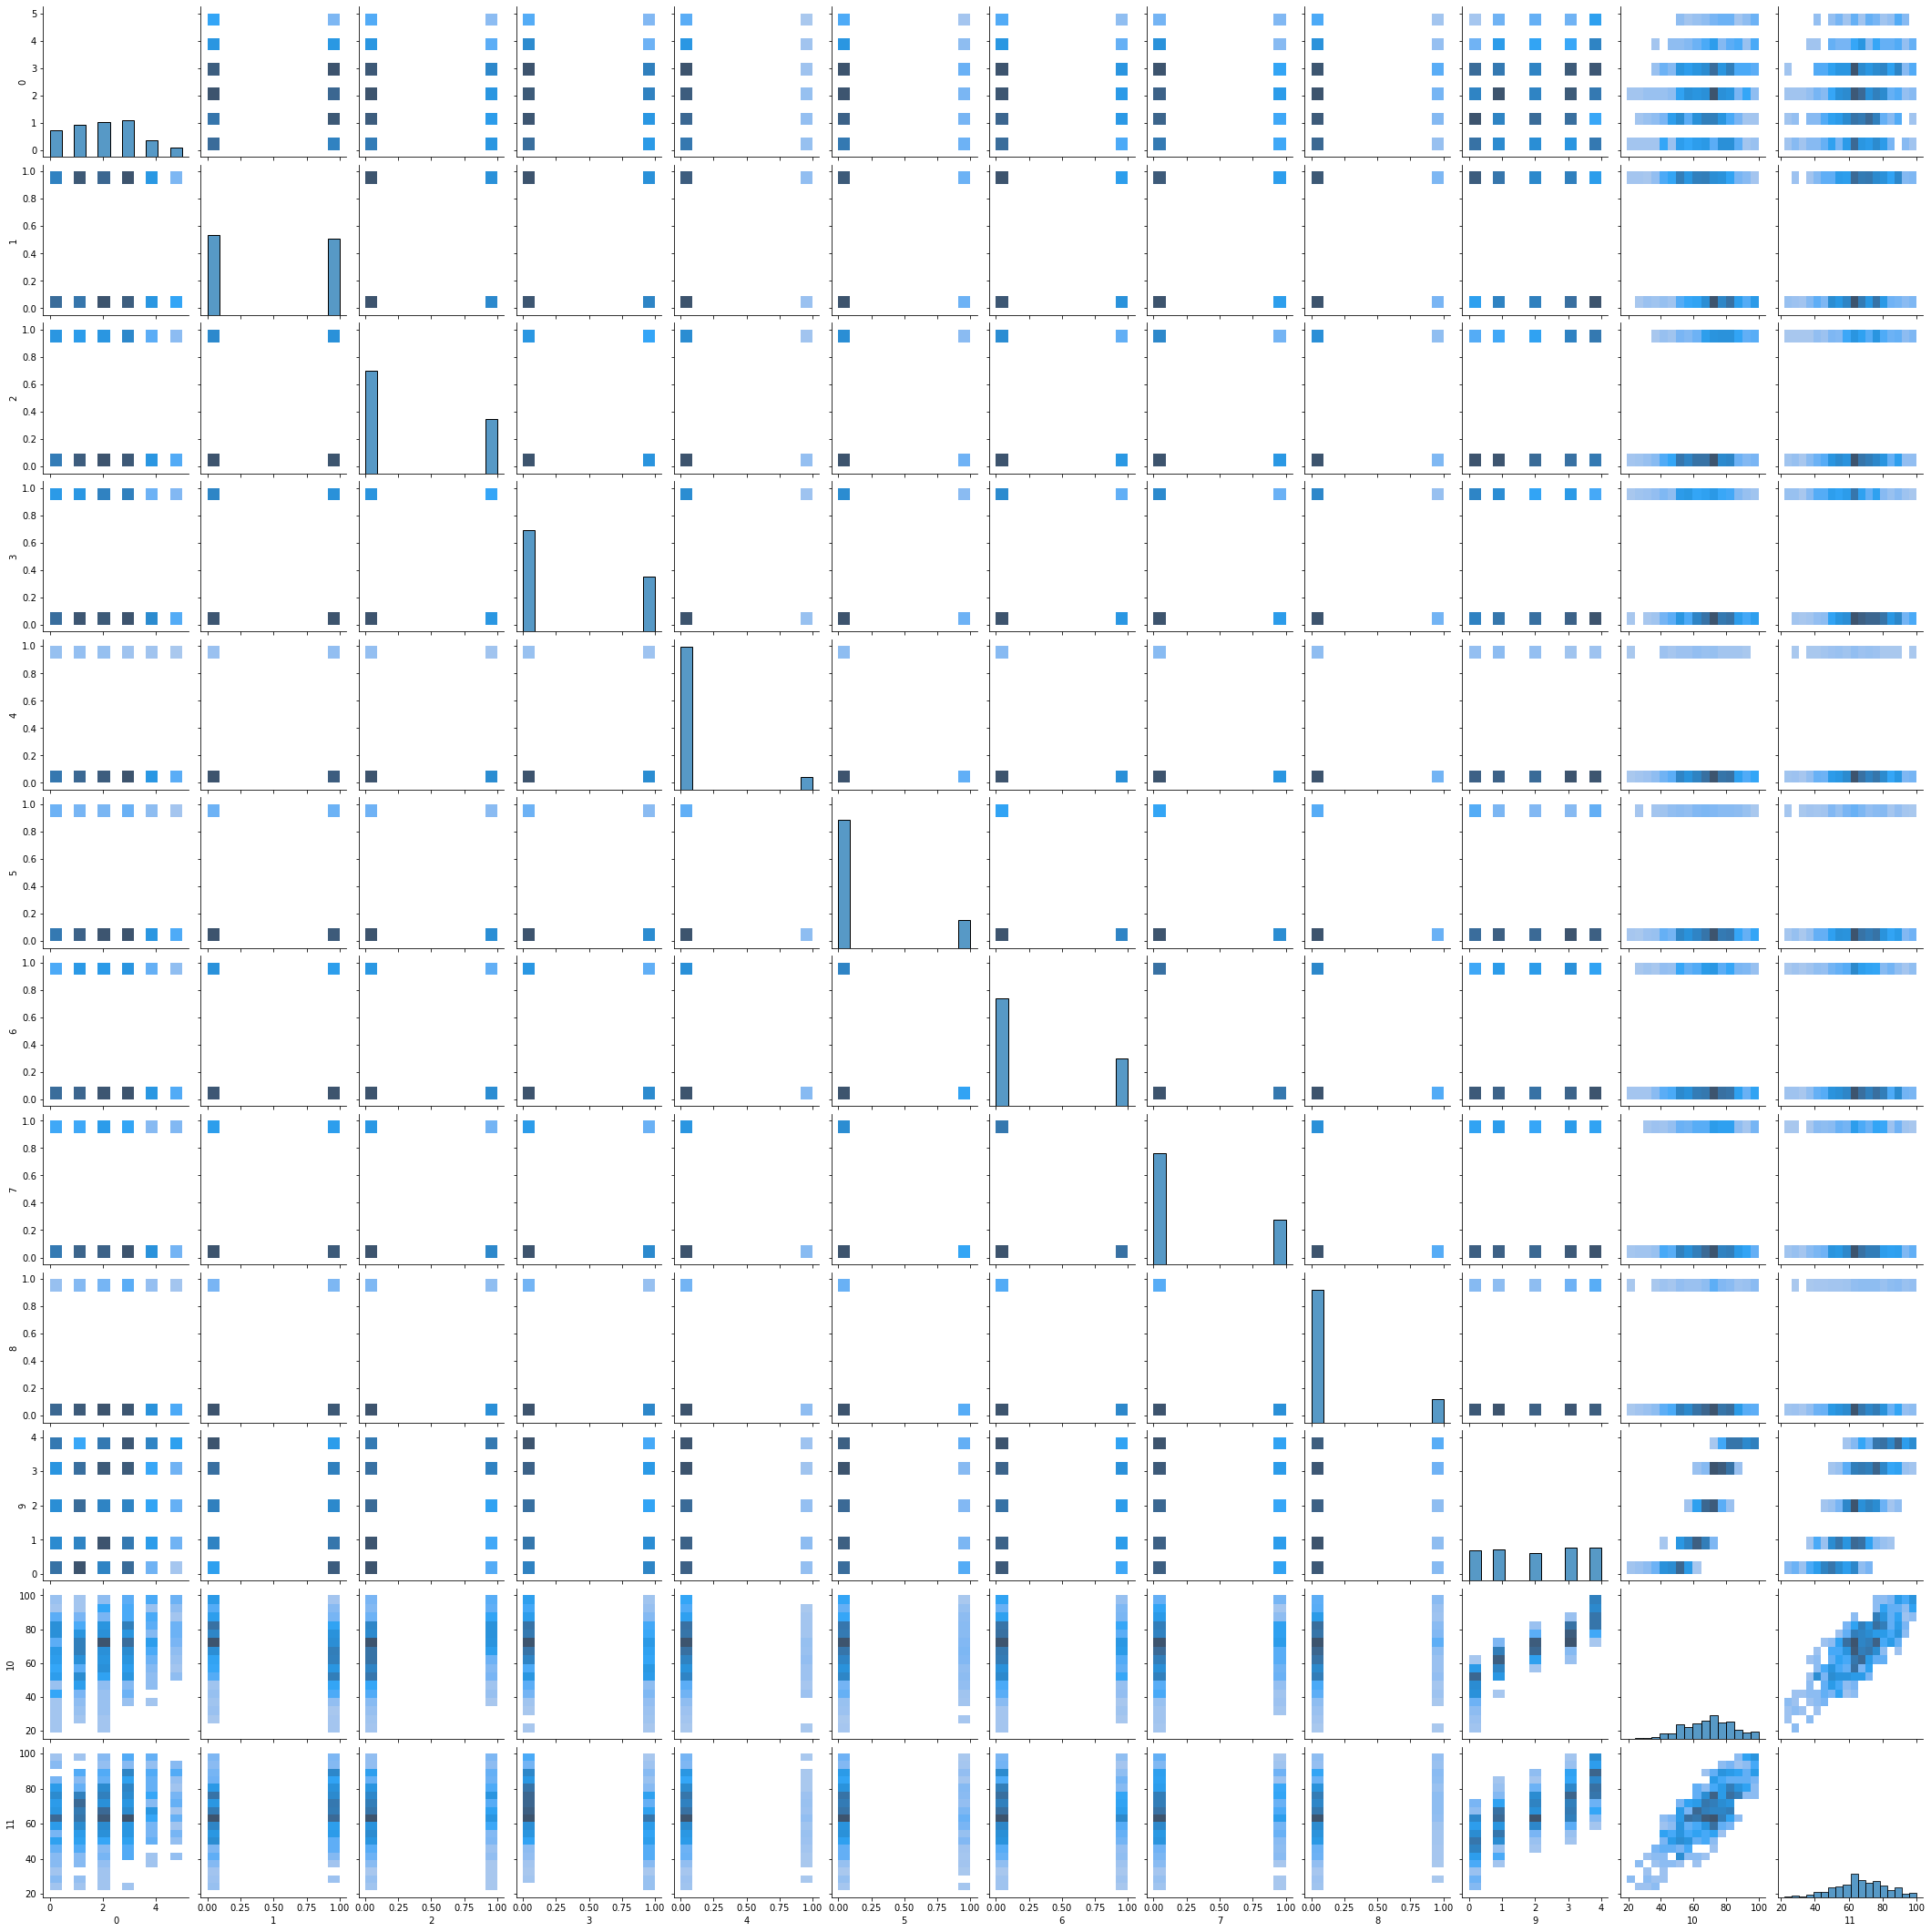

In [149]:
sns.pairplot(pd.DataFrame(X),kind='hist')

In [151]:
#linear
lm = sklearn.linear_model.LinearRegression()
lm.fit(X[:,:-3],X[:,-1])

LinearRegression()

In [152]:
X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = lm.predict(X_test[:,:-3])

In [155]:
X[:,-1]

array([ 75.,  75.,  52.,  68.,  54.,  87.,  97.,  37.,  24.,  60.,  30.,  59.,  61.,  47.,  59.,  62.,  84.,  45.,  74.,  94.,  64.,  64.,  69.,  63.,  85.,  76.,  70.,  79.,  43.,  72.,  40.,  65.,  93.,  66.,  59.,  85.,  76.,  74.,  52.,  61.,  60.,  64.,  55.,  35.,  46.,  23.,  85.,  62.,  96.,  58.,  60.,  35.,  54.,  78.,  62.,  70.,  61.,  73.,  62.,  45.,  49.,  40.,  38.,  83.,  55.,  59.,  90.,  65.,  46.,  87.,  64.,  79.,  85.,  62.,  59.,  68.,  56.,  69.,  71.,  76.,  63.,  58.,  53.,  78.,  75.,  88.,  53.,  87.,  73.,  42.,  52.,  73.,  59.,  94.,  74.,  76.,  44.,  53.,  73.,  74.,  66.,  66.,  87.,  52.,  46.,  59.,  81.,  70.,  76.,  83.,  69.,  52.,  50.,  77.,  68.,  75.,  62.,  22.,  52.,  61.,  48.,  56.,  57.,  76.,  90.,  28.,  79.,  61., 100.,  55.,  63.,  94.,  45.,  44.,  43., 100.,  87.,  53.,  54.,  44.,  67.,  60.,  64.,  65.,  53.,  89.,  67.,  69.,  90.,  77.,  54.,  52.,  61.,  91.,  56.,  49.,  66.,  73.,  29.,  64.,  81.,  88.,  89.,  65.,  41.,
   

In [154]:
# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % sklearn.metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % sklearn.metrics.r2_score(y_test, y_pred))


Coefficients: 
 [  1.87226449   4.6383037    6.1957448  -10.69395674  -3.59925758  -1.78494334  -0.8906293    0.38383323   5.89099699]
Mean squared error: 172.70
Coefficient of determination: 0.25


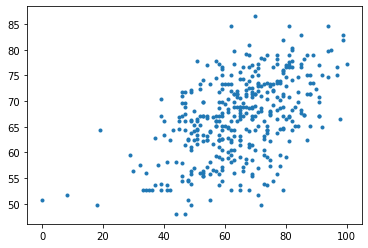

In [118]:
plt.plot(y_test, y_pred,'.')

In [126]:
from sklearn.neighbors import KNeighborsRegressor
lm = KNeighborsRegressor(n_neighbors=2)
lm.fit(X[:,:-3],X[:,-1])
X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = lm.predict(X_test[:,:-3])

# The mean squared error
print("Mean squared error: %.2f" % sklearn.metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 266.36


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,female,group B,bachelor's degree,standard,none,72,74,72
1,female,group C,some college,standard,completed,90,88,69
2,female,group B,master's degree,standard,none,95,93,90
3,male,group A,associate's degree,free/reduced,none,57,44,47
4,male,group C,some college,standard,none,78,75,76
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,88
996,male,group C,high school,free/reduced,none,55,55,62
997,female,group C,high school,free/reduced,completed,71,65,59
998,female,group D,some college,standard,completed,78,77,68


In [129]:
#Categories

In [168]:
# Class
df = pd.read_csv("StudentsPerformance.csv")
df = df.reindex(columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score',
       'writing score', 'math score'])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,female,group B,bachelor's degree,standard,none,72,74,72
1,female,group C,some college,standard,completed,90,88,69
2,female,group B,master's degree,standard,none,95,93,90
3,male,group A,associate's degree,free/reduced,none,57,44,47
4,male,group C,some college,standard,none,78,75,76
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,88
996,male,group C,high school,free/reduced,none,55,55,62
997,female,group C,high school,free/reduced,completed,71,65,59
998,female,group D,some college,standard,completed,78,77,68


<AxesSubplot:>

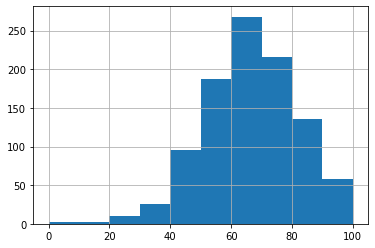

In [169]:
df['math score'].hist(bins=10)

In [170]:
df['math_failed'] = (df['math score'] < 50).astype('int')

In [171]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,math_failed
0,female,group B,bachelor's degree,standard,none,72,74,72,0
1,female,group C,some college,standard,completed,90,88,69,0
2,female,group B,master's degree,standard,none,95,93,90,0
3,male,group A,associate's degree,free/reduced,none,57,44,47,1
4,male,group C,some college,standard,none,78,75,76,0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,88,0
996,male,group C,high school,free/reduced,none,55,55,62,0
997,female,group C,high school,free/reduced,completed,71,65,59,0
998,female,group D,some college,standard,completed,78,77,68,0


In [172]:
train, test = sklearn.model_selection.train_test_split(df, test_size=0.4,random_state=20211202)

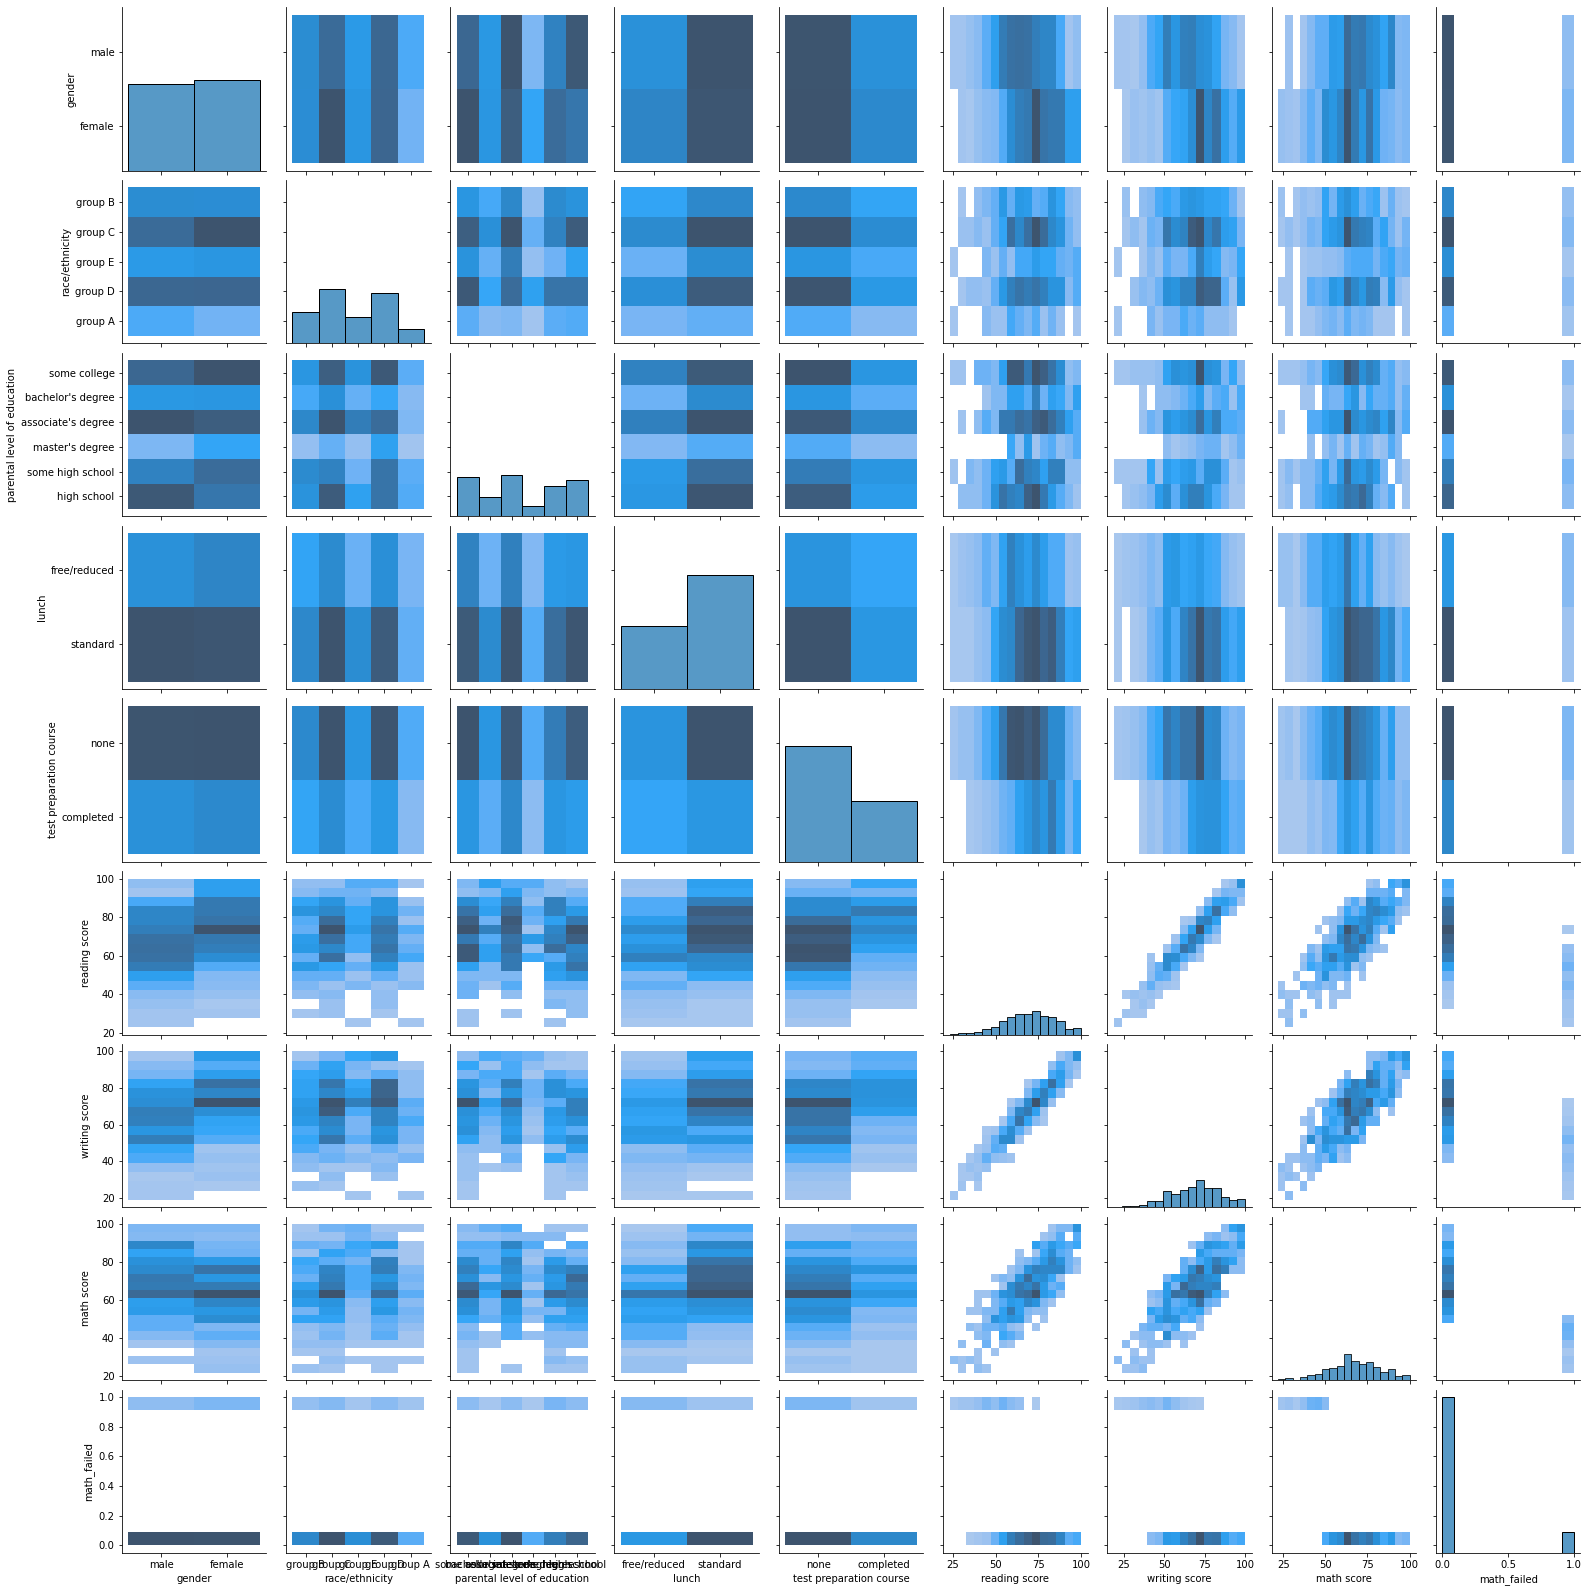

In [142]:
sns.pairplot(train,vars=df.columns,kind='hist')

In [217]:
column_trans =  sklearn.compose.ColumnTransformer(
    [
        ('ordinal', 
         sklearn.preprocessing.OrdinalEncoder(categories=[['some high school', 'high school','some college', "associate's degree", "bachelor's degree", 
         "master's degree"]]), 
        #sklearn.preprocessing.OneHotEncoder(),
         ['parental level of education']),
        ('category', sklearn.preprocessing.OrdinalEncoder(categories=[
            ['female', 'male'],
            ['none','completed'],
            ['standard', 'free/reduced']]), 
         ["gender",'test preparation course',"lunch"]),
        ('onehot', sklearn.preprocessing.OneHotEncoder(),['race/ethnicity']),
        ('desc', sklearn.preprocessing.KBinsDiscretizer(encode='ordinal'), ['reading score'])
        
    ], remainder='passthrough'
)
column_trans.fit(train)
X = column_trans.transform(train)
scaler = sklearn.preprocessing.StandardScaler().fit(X)
Xscaled = scaler.transform(X)
X

array([[  2.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   2.,  65.,  75.,   0.],
       [  2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,  84.,  75.,   0.],
       [  4.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,  66.,  52.,   0.],
       [  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,  66.,  68.,   0.],
       [  3.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,  65.,  54.,   0.],
       [  5.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   4., 100.,  87.,   0.],
       [  3.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   4.,  91.,  97.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,  46.,  37.,   1.],
       [  0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,  27.,  24.,   1.],
       [  0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,  54.,  60.,   0.],
       [  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,  22.,  30.,   1.],
       [  2.,   1.,   0.,   0.,   0.,   0.,

In [249]:
import sklearn.neighbors

clf = sklearn.neighbors.KNeighborsClassifier(4,weights='distance')
clf.fit(X[:,:-3], X[:,-1])

X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = clf.predict(X_test[:,:-3])

print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.confusion_matrix(y_test,y_pred))

0.8775
[[327  10]
 [ 39  24]]


In [238]:
from sklearn.model_selection import KFold
kf = KFold()
for nn in range(1,11):
    print(nn)
    for train2, test2 in kf.split(X):
        clf = sklearn.neighbors.KNeighborsClassifier(nn,weights='distance')
        clf.fit(X[:,:-4], X[:,-1])

        X_test = column_trans.transform(test)
        y_test = X_test[:,-1]
        y_pred = clf.predict(X_test[:,:-4])

        
        print(sklearn.metrics.accuracy_score(y_test,y_pred))
        #print(sklearn.metrics.confusion_matrix(y_test,y_pred))
    

1
0.785
0.785
0.785
0.785
0.785
2
0.8425
0.8425
0.8425
0.8425
0.8425
3
0.84
0.84
0.84
0.84
0.84
4
0.845
0.845
0.845
0.845
0.845
5
0.845
0.845
0.845
0.845
0.845
6
0.8475
0.8475
0.8475
0.8475
0.8475
7
0.8475
0.8475
0.8475
0.8475
0.8475
8
0.8475
0.8475
0.8475
0.8475
0.8475
9
0.8475
0.8475
0.8475
0.8475
0.8475
10
0.8475
0.8475
0.8475
0.8475
0.8475


In [254]:
param_grid = {
    'weights': ['uniform','distance'],
    'n_neighbors': list(range(1,10))
    }
import sklearn.model_selection

clf = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), param_grid, scoring='accuracy')
clf.fit(X[:,:-3], X[:,-1])

X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = clf.predict(X_test[:,:-3])


print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.confusion_matrix(y_test,y_pred))

0.87
[[326  11]
 [ 41  22]]


In [255]:
from pprint import pprint
pprint(clf.cv_results_)

{'mean_fit_time': array([0.00076394, 0.00022383, 0.00100274, 0.00040159, 0.00039997, 0.00059996, 0.00040021, 0.00059958, 0.00079956, 0.00079951, 0.00080152, 0.00060034, 0.00079832, 0.00060019, 0.0004004 , 0.00060105, 0.00019999, 0.00039811]),
 'mean_score_time': array([0.00218425, 0.00079665, 0.0019989 , 0.0009984 , 0.00220084, 0.00100002, 0.00219774, 0.0004005 , 0.0020021 , 0.00060053, 0.00199847, 0.00079999, 0.00200171, 0.00059996, 0.00199966, 0.00099893, 0.00260005, 0.00100207]),
 'mean_test_score': array([0.855     , 0.855     , 0.88666667, 0.88      , 0.87666667, 0.875     , 0.88833333, 0.88166667, 0.87666667, 0.86666667, 0.88666667, 0.87833333, 0.88333333, 0.875     , 0.88666667, 0.87833333, 0.89166667, 0.88      ]),
 'param_n_neighbors': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
             mask=[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False],
       fill_value='?',
  

In [219]:
import sklearn.naive_bayes

clf = sklearn.naive_bayes.GaussianNB()
clf.fit(X[:,:-4], X[:,-1])

X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = clf.predict(X_test[:,:-4])

print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.confusion_matrix(y_test,y_pred))

0.8525
[[328   9]
 [ 50  13]]


In [220]:
import sklearn.tree

clf = sklearn.tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X[:,:-4], X[:,-1])

X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = clf.predict(X_test[:,:-4])

print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.confusion_matrix(y_test,y_pred))


0.855
[[335   2]
 [ 56   7]]


[Text(161.47125, 201.90857142857143, 'X[3] <= 0.5\ngini = 0.211\nsamples = 600\nvalue = [528, 72]'),
 Text(91.3725, 170.84571428571428, 'X[0] <= 1.5\ngini = 0.102\nsamples = 388\nvalue = [367, 21]'),
 Text(59.985, 139.78285714285715, 'X[2] <= 0.5\ngini = 0.168\nsamples = 151\nvalue = [137, 14]'),
 Text(30.69, 108.72, 'X[0] <= 0.5\ngini = 0.204\nsamples = 104\nvalue = [92, 12]'),
 Text(16.740000000000002, 77.65714285714284, 'X[7] <= 0.5\ngini = 0.25\nsamples = 41\nvalue = [35, 6]'),
 Text(11.16, 46.59428571428572, 'X[1] <= 0.5\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(5.58, 15.531428571428563, 'gini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(16.740000000000002, 15.531428571428563, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(22.32, 46.59428571428572, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(44.64, 77.65714285714284, 'X[7] <= 0.5\ngini = 0.172\nsamples = 63\nvalue = [57, 6]'),
 Text(33.480000000000004, 46.59428571428572, 'X[8] <= 0.5\ngini = 0.122\nsa

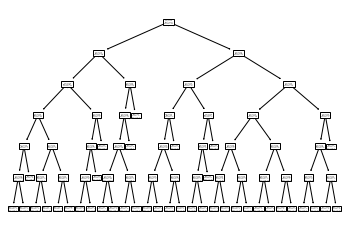

In [221]:
sklearn.tree.plot_tree(clf)

In [222]:
import sklearn.ensemble
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=10)
clf.fit(X[:,:-4], X[:,-1])

X_test = column_trans.transform(test)
y_test = X_test[:,-1]
y_pred = clf.predict(X_test[:,:-4])

print(sklearn.metrics.accuracy_score(y_test,y_pred))
print(sklearn.metrics.confusion_matrix(y_test,y_pred))

0.85
[[327  10]
 [ 50  13]]
